# Preparing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dataset edc phyc bias.csv')

In [3]:
data.head()

,Jalur masuk,UKT,BEA,1,2,3,4,5,6,7,IPK,Lama studi
0,1,4,0,3.54,3.37,3.20,3.34,3.49,3.17,3.90,3.37,0.0
1,1,6,0,3.44,3.56,3.48,3.56,3.62,3.19,4.00,3.50,5.0
2,2,4,0,3.69,3.61,3.38,3.71,3.51,3.22,4.00,3.54,4.5
3,1,4,0,3.07,3.40,1.94,3.30,3.67,3.55,3.83,3.35,0.0
4,1,4,0,3.28,3.68,3.53,3.73,3.78,3.27,4.00,3.57,4.0


# data preprocessing

In [4]:
#Get Target data 
y = data[['IPK']]

#Load X Variables into a Pandas Dataframe with columns 
X = data.drop(['IPK'], axis = 1)

In [5]:
X.shape

(191, 11)

In [6]:
y.shape

(191, 1)

In [7]:
print(X[:10])

   Jalur masuk  UKT  BEA     1     2     3     4     5     6     7  Lama studi
0            1    4    0  3.54  3.37  3.20  3.34  3.49  3.17  3.90         0.0
1            1    6    0  3.44  3.56  3.48  3.56  3.62  3.19  4.00         5.0
2            2    4    0  3.69  3.61  3.38  3.71  3.51  3.22  4.00         4.5
3            1    4    0  3.07  3.40  1.94  3.30  3.67  3.55  3.83         0.0
4            1    4    0  3.28  3.68  3.53  3.73  3.78  3.27  4.00         4.0
5            2    4    0  3.55  3.68  3.49  3.70  3.81  3.41  4.00         0.0
6            2    5    0  3.72  3.76  3.60  3.73  3.78  3.83  4.00         5.0
7            1    4    0  3.25  3.42  3.17  3.60  3.80  3.29  4.00         4.0
8            2    3    0  3.60  3.70  3.62  3.58  3.75  3.81  4.00         5.0
9            2    5    0  3.49  3.59  3.59  3.77  3.81  3.81  4.00         5.0


In [8]:
print(y)

      IPK
0    3.37
1    3.50
2    3.54
3    3.35
4    3.57
..    ...
186  3.56
187  3.24
188  3.71
189  3.74
190  3.66

[191 rows x 1 columns]


# Train-test split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20,random_state=0)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(152, 11) (39, 11) (152, 1) (39, 1)


# Model Build

In [11]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [12]:
model = RandomForestRegressor(n_estimators=200, random_state = 42)

In [13]:
#Fitting the modelm
model.fit(X_train,y_train)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15968\855957738.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [14]:
model.fit(X_test,y_test)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15968\3250627512.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_test,y_test)


RandomForestRegressor(n_estimators=200, random_state=42)

In [15]:
y_train_pred = model.predict(X_train)

In [16]:
y_test_pred = model.predict(X_test)

In [17]:
print(y_train_pred[:10])

[3.68115 3.6346  3.2871  3.6385  3.48195 3.495   3.6526  3.58335 3.4754
 3.61435]


In [18]:
print (y_test_pred)

[3.536   3.58735 3.4986  3.53825 3.7588  3.5861  3.4591  3.21325 3.6299
 3.4556  3.5922  3.6335  3.75245 3.67555 3.62715 3.492   2.95745 3.5915
 3.4085  3.68915 3.51735 3.68955 3.7381  3.67835 3.49335 3.67005 3.59475
 3.4724  3.7064  3.593   3.57485 3.40535 3.59255 3.6329  3.66415 3.5661
 3.72695 3.6767  3.5587 ]


In [41]:
print(y_test.values.flatten())

[3.56 3.54 3.5  3.52 3.78 3.55 3.43 3.14 3.62 3.45 3.62 3.63 3.79 3.69
 3.63 3.49 2.72 3.6  3.42 3.71 3.51 3.71 3.75 3.71 3.49 3.68 3.59 3.47
 3.71 3.58 3.57 3.38 3.57 3.62 3.66 3.57 3.73 3.69 3.55]


# Hyperparameter tuning

In [19]:
from pprint import pprint

In [20]:
#Create the param
params = {
'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_jobs': 1,
 'oob_score': False,
 'verbose': 0,
 'warm_start': False}

# Randomizedsearch algorithm

In [26]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [27]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using k fold cross validation, 
# search across 100 different combinations, and use all available cores
model = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [28]:
model.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [29]:
def evaluate(model, y_test, y_test_pred):
    predictions = model.predict(y_test)
    errors = abs(predictions - y_test_pred)
    mape = 100 * np.mean(errors / y_test_pred)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
model = RandomForestRegressor(n_estimators = 10, random_state = 42)
model.fit(y_test, y_test_pred)
model_accuracy = evaluate(model, y_test, y_test_pred)

Model Performance
Average Error: 0.0129 degrees.
Accuracy = 99.61%.


# Gridsearch algorithm

In [30]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [0, 'auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
model = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [31]:
# Fit the grid search to the data
grid_search.fit(y_test, y_test_pred)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1440 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Acer\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Acer\anaconda3\lib\site-packages\j

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [0, 'auto'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [32]:
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': 110, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 300}


In [33]:
best_grid = grid_search.best_estimator_

In [34]:
grid_accuracy = evaluate(best_grid, y_test, y_test_pred)

Model Performance
Average Error: 0.0331 degrees.
Accuracy = 99.01%.


# model evaluation

In [35]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [36]:
model.fit(X_train,y_train)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15968\2721349307.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor()

In [37]:
model.fit(X_test,y_test)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15968\3250627512.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_test,y_test)


RandomForestRegressor()

In [38]:
#corelation
print(r2_score(y_train,y_train_pred))

0.7397014106032072


In [39]:
print(mean_absolute_error(y_train, y_train_pred))

0.05380296052631508


In [40]:
print(mean_squared_error(y_train, y_train_pred))

0.006485864819078777


In [41]:
#RMSE
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))

0.08053486710163975


In [42]:
#corelation (r^2)
print(r2_score(y_test,y_test_pred))

0.944054058725687


In [43]:
#MAE
print(mean_absolute_error(y_test, y_test_pred))

0.021532051282050668


In [44]:
#MSE
print(mean_squared_error(y_test, y_test_pred))

0.0019040158333333622


In [45]:
#RMSE
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

0.043635029888076875


C:\Users\Acer\anaconda3\lib\site-packages\yellowbrick\base.py:390: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **kwargs)


TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

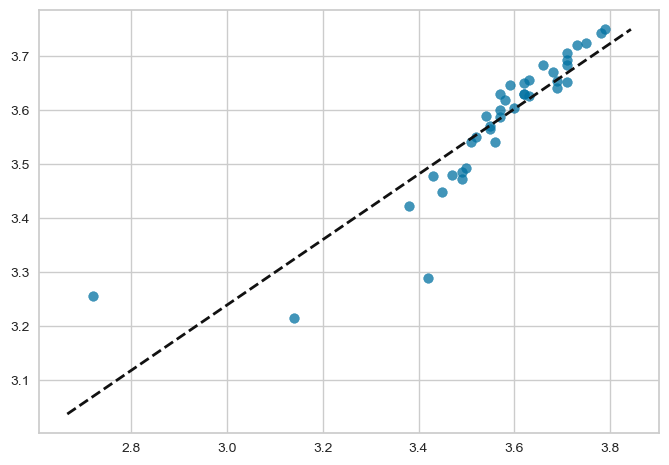

In [46]:
#Plotting
from yellowbrick.regressor import PredictionError
model = RandomForestRegressor()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()